<a href="https://colab.research.google.com/github/SanchithVel/NBA-PPG-Predictor/blob/main/NBA_PPG_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
from sklearn import tree
from sklearn.metrics import mean_absolute_error, r2_score
import joblib
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 200) #Shows all columns instead of skipping when printing DataFrame

In [4]:
# Loading dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/NBA_Stats_2324.csv')

df.shape

(213, 29)

In [5]:
df.head(5)

,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,FT%,2PA,2P%,3PA,3P%,eFG%,TS%,PPG,RPG,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,1,Joel Embiid,Phi,C,30.2,6,41.4,35.7,15.8,78,0.859,94,0.489,39,0.333,0.492,0.592,33.0,10.8,5.7,1.2,1.5,4.2,43.8,38.7,49.5,12.2,117.1,108.0
1,2,Jalen Brunson,Nyk,G,27.8,13,39.8,36.4,9.3,120,0.775,256,0.488,84,0.310,0.482,0.536,32.4,3.3,7.5,0.8,0.2,2.7,35.7,39.8,43.2,9.3,114.8,114.7
2,3,Damian Lillard,Mil,G,33.9,4,39.1,31.4,10.0,38,0.974,33,0.424,48,0.417,0.543,0.640,31.3,3.3,5.0,1.0,0.0,2.3,34.5,36.3,39.5,8.2,127.6,115.7
3,4,Shai Gilgeous-Alexander,Okc,G,25.9,10,39.9,32.3,8.9,81,0.790,187,0.508,37,0.432,0.531,0.582,30.2,7.2,6.4,1.3,1.7,2.2,37.4,36.6,43.8,11.2,118.3,106.9
4,5,Tyrese Maxey,Phi,G,23.6,6,44.6,28.1,8.6,28,0.893,83,0.530,55,0.400,0.558,0.595,29.8,5.2,6.8,0.8,0.3,2.2,35.0,36.7,41.8,9.1,120.9,113.3


In [7]:
# Prepare feature set (X) and target variable (y)
X = df[['USG%', 'MPG', 'FTA', '3PA', '2PA']]  # Feature set with:
# USG%: Usage percentage, measuring player involvement in team plays
# MPG: Minutes per game, showing average playing time
# FTA: Free throw attempts, indicating scoring from free throws
# 3PA: 3-point attempts, tracking long-range shot attempts
# PA: 2-point attempts, representing closer or mid-range shots

y = df['PPG']  # Target variable

# Split data into random training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a new Decision Tree Regressor instance
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Persist the trained model to a file
joblib.dump(model, 'PPG_Predictor.joblib')

['PPG_Predictor.joblib']

In [8]:
# Load the model from the file
model = joblib.load('PPG_Predictor.joblib')

# Predict PPG values for the test set
predictions = model.predict(X_test)

# Calculate and display regression metrics

# Average absolute difference between predictions and actual values
mae = mean_absolute_error(y_test, predictions)

# How well the model's predictions match actual values
r2 = r2_score(y_test, predictions)

print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Mean Absolute Error (MAE): 1.4325581395348836
R² Score: 0.9334238814387164


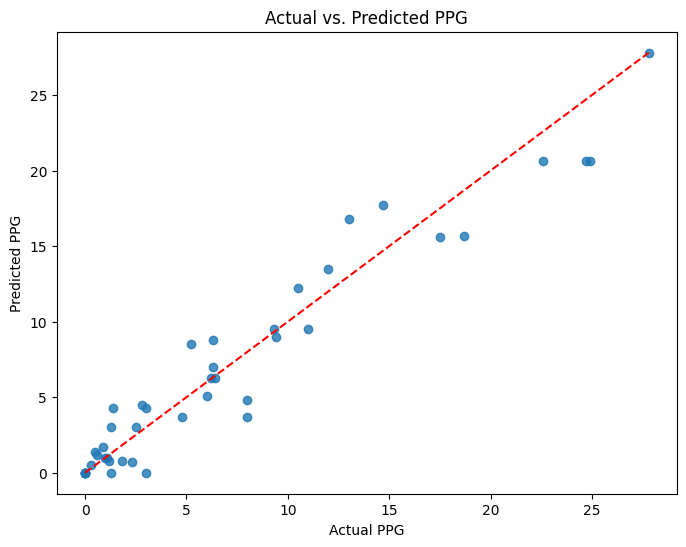

In [9]:
# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.8)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line for reference
plt.xlabel('Actual PPG')
plt.ylabel('Predicted PPG')
plt.title('Actual vs. Predicted PPG')
plt.show()

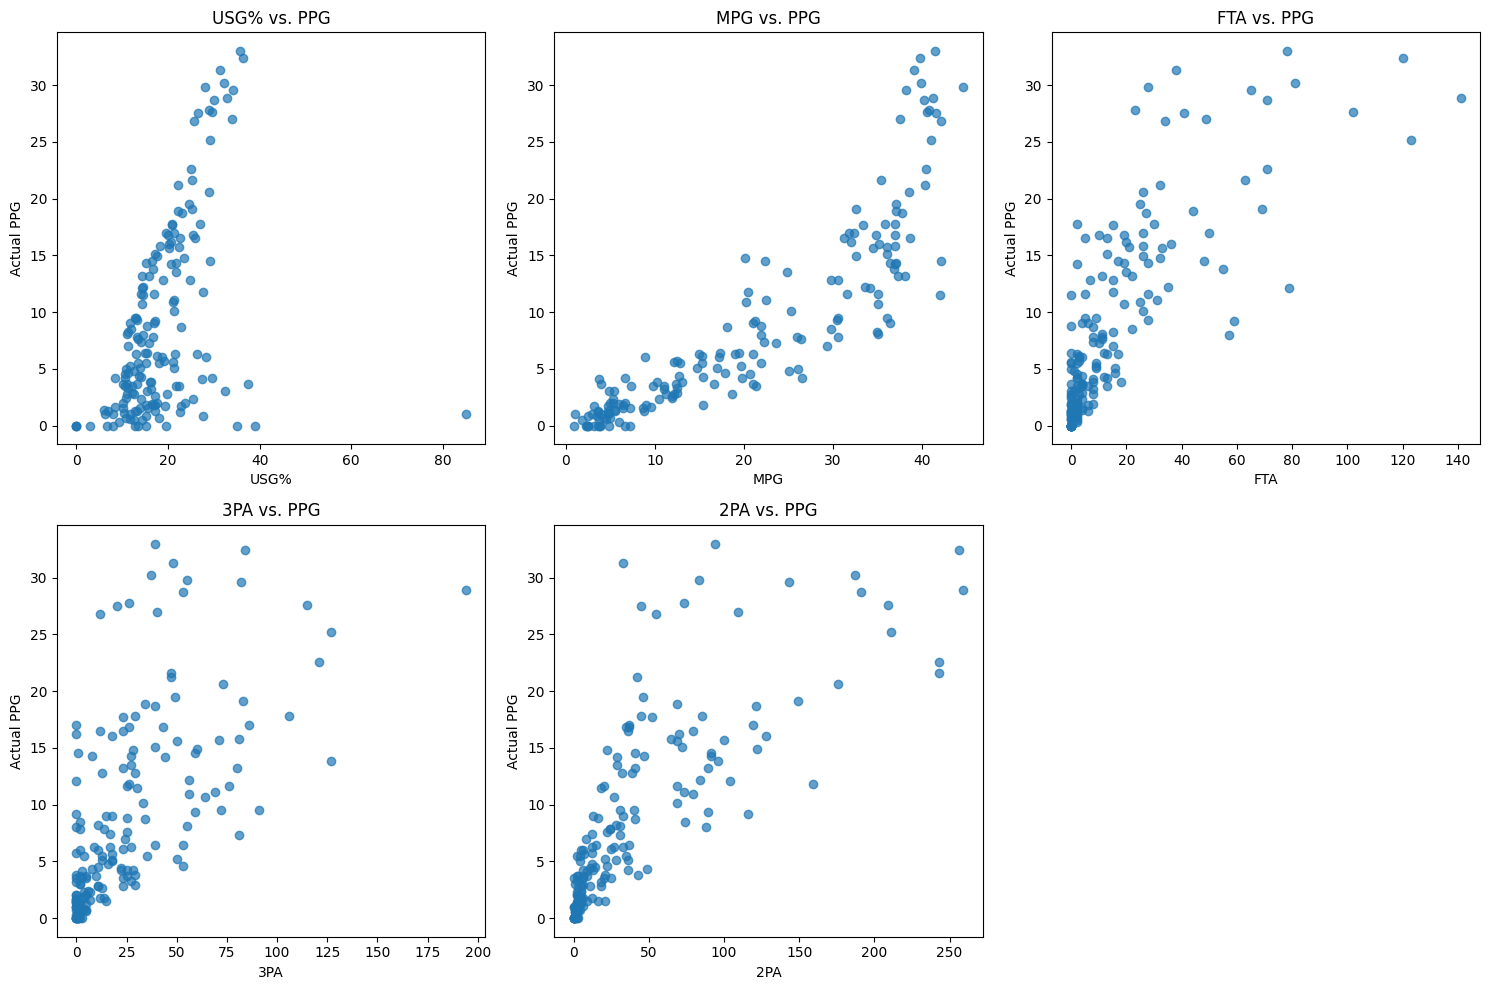

In [11]:
feature_names = ['USG%', 'MPG', 'FTA', '3PA', '2PA']
features = [X_train['USG%'], X_train['MPG'], X_train['FTA'], X_train['3PA'], X_train['2PA']]

plt.figure(figsize=(15, 10))

# Create scatter plots for each feature variable against the target variable (PPG)
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid of subplots
    plt.scatter(feature, y_train, alpha=0.7)
    plt.xlabel(feature_names[i])
    plt.ylabel('Actual PPG')
    plt.title(f'{feature_names[i]} vs. PPG')

plt.tight_layout()  # Prevent overlapping
plt.show()

In [ ]:
# Format: [USG%, MPG, FTA, 3PA, 2PA]
new_data = pd.DataFrame([[32, 5, 12, 2, 3]], columns=['USG%', 'MPG', 'FTA', '3PA', '2PA'])

# Predict the PPG for this new data point
new_prediction = model.predict(new_data)

print("Predicted PPG for the new data:", new_prediction[0])

Predicted PPG for the new data: 3.7
